In [69]:
from sklearn.datasets import load_digits

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
datos=load_digits()


In [72]:
datos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

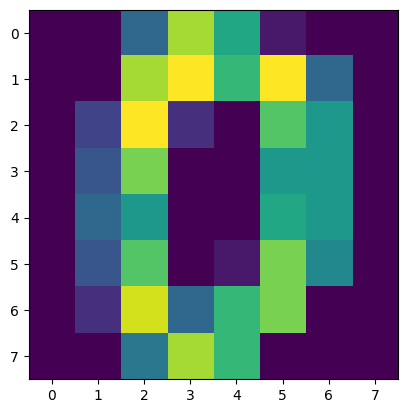

In [73]:
plt.imshow(datos.images[0])

In [74]:
datos.data.shape

(1797, 64)

In [75]:
X = datos.data
y = datos['target']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
#mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20,10),activation="relu",random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20),activation="relu",solver="sgd",random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20),activation="relu",solver="lbfgs",random_state=42)
mlp=MLPClassifier(hidden_layer_sizes=(10,20,20,10),activation="relu",solver="adam",random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20,10),activation="relu",solver="adam",random_state=42)#ok


In [80]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 20, 20, 10), random_state=42)

In [81]:
ypredtest=mlp.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [83]:
mx=confusion_matrix(y_test,ypredtest)
mx

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  2,  0,  0,  1],
       [ 0,  0, 48,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1, 49,  0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 58,  0,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  1, 56,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 52,  1,  0],
       [ 0,  6,  1,  0,  1,  1,  0,  0, 50,  0],
       [ 0,  2,  0,  2,  0,  1,  0,  0,  0, 43]])

<Axes: >

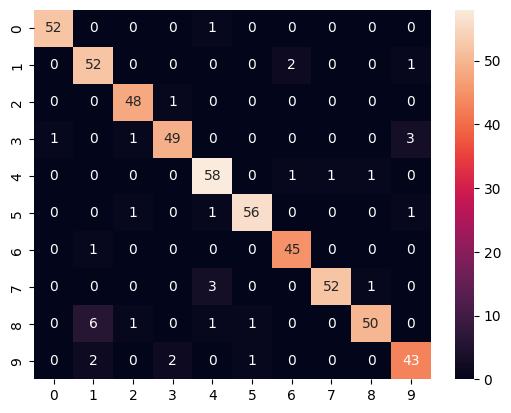

In [84]:
sns.heatmap(mx,annot=True)

In [85]:
accuracy_score(y_test,ypredtest)

0.9351851851851852

In [86]:
print(classification_report(y_test,ypredtest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.85      0.95      0.90        55
           2       0.94      0.98      0.96        49
           3       0.94      0.91      0.92        54
           4       0.91      0.95      0.93        61
           5       0.97      0.95      0.96        59
           6       0.94      0.98      0.96        46
           7       0.98      0.93      0.95        56
           8       0.96      0.85      0.90        59
           9       0.90      0.90      0.90        48

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540

